In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('E:\Data Science\PowerBI\Power BI Github\Automobile-Car-Industry-Financial-Sales-Dashboard-Analysis\Car Automobile Sales Analysis.xlsx')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Admin\AppData\Local\Temp\ipykernel_23548\36568333.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_excel('E:\Data Science\PowerBI\Power BI Github\Automobile-Car-Industry-Financial-Sales-Dashboard-Analysis\Car Automobile Sales Analysis.xlsx')


,InvoiceDate,Manufacturer,Country,SalePrice,CostPrice,Discount,DeliveryCharges,SpareParts,LaborCost,ClientName,Model,Color,ReportingYear,ReportingMonth,Registration_Date,VehicleType
0,2012-01-01,Aston Martin,United Kingdom,110000,125000,0.0,1750,1950,752,Cut'n'Shut,Vanquish,Red,2013,12,2001-09-01,Coupe
1,2012-01-01,Jaguar,USA,44000,25000,500.0,450,1950,486,Rocky Riding,XK,Dark Purple,2012,1,2000-09-01,Coupe
2,2012-01-01,Jaguar,USA,45000,37500,500.0,450,1950,486,Rocky Riding,XJ6,British Racing Green,2012,2,2000-09-01,Saloon
3,2012-02-01,Jaguar,Switzerland,39500,25000,500.0,0,1950,486,Voitures Diplomatiques S.A.,XJ12,Black,2012,3,2000-09-01,Saloon
4,2012-02-01,Jaguar,France,44000,37500,500.0,500,1950,486,Les Arnaqueurs,XK,Canary Yellow,2012,4,2000-09-01,Coupe


In [9]:
df.shape

(457, 16)

In [10]:
df.dropna

<bound method DataFrame.dropna of     InvoiceDate  Manufacturer         Country  SalePrice  CostPrice  Discount  \
0    2012-01-01  Aston Martin  United Kingdom     110000     125000       0.0   
1    2012-01-01        Jaguar             USA      44000      25000     500.0   
2    2012-01-01        Jaguar             USA      45000      37500     500.0   
3    2012-02-01        Jaguar     Switzerland      39500      25000     500.0   
4    2012-02-01        Jaguar          France      44000      37500     500.0   
..          ...           ...             ...        ...        ...       ...   
452  2015-12-02  Aston Martin             USA      39750      27500    1300.0   
453  2015-12-02  Aston Martin             USA      40440      22500     550.0   
454  2015-12-02   Rolls Royce             USA      72000      22500    1050.0   
455  2015-12-02  Aston Martin             USA      40440      36125     800.0   
456  2015-12-02  Aston Martin             USA      77250      22500     550

In [12]:
df.columns

Index(['InvoiceDate', 'Manufacturer', 'Country', 'SalePrice', 'CostPrice',
       'Discount', 'DeliveryCharges', 'SpareParts', 'LaborCost', 'ClientName',
       'Model', 'Color', 'ReportingYear', 'ReportingMonth',
       'Registration_Date', 'VehicleType'],
      dtype='object')

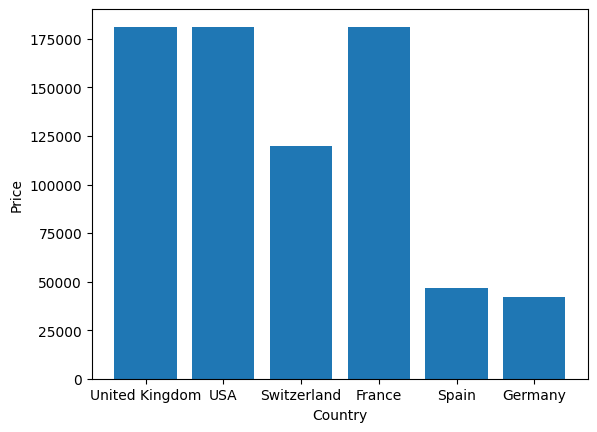

In [15]:
plt.bar(df['Country'], df['SalePrice'])
plt.xlabel('Country')
plt.ylabel('Price')
plt.show()

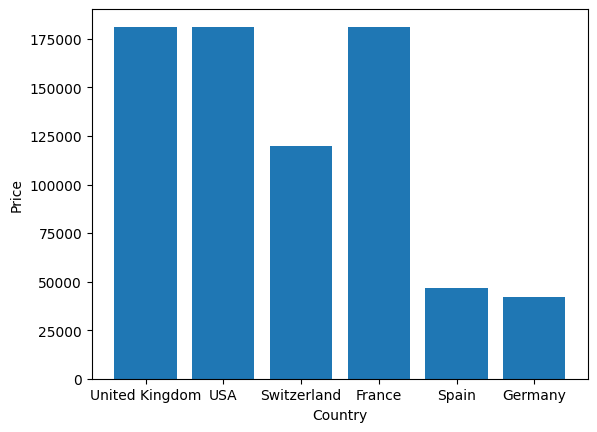

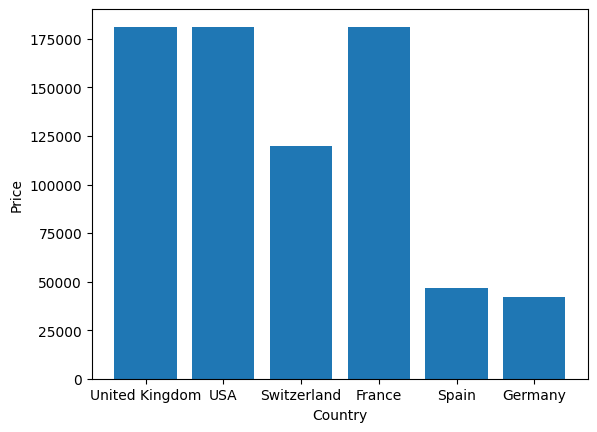

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(r'E:\Data Science\PowerBI\Power BI Github\Automobile-Car-Industry-Financial-Sales-Dashboard-Analysis\Car Automobile Sales Analysis.xlsx')

plt.bar(df['Country'], df['SalePrice'])
plt.xlabel('Country')
plt.ylabel('Price')

# Return the figure to Power BI
plt.gcf()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from datetime import datetime, timedelta

# Load the dataset
df = pd.read_excel("TWTR.xlsx")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Function to filter data for different time periods
def filter_data(period):
    end_date = df['Date'].max()
    
    if period == "1M":
        start_date = end_date - timedelta(days=30)
    elif period == "6M":
        start_date = end_date - timedelta(days=182)
    elif period == "1Y":
        start_date = end_date - timedelta(days=365)
    elif period == "5Y":
        start_date = end_date - timedelta(days=5*365)
    else:  # MAX
        start_date = df['Date'].min()
    
    return df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(bottom=0.25)
(line,) = ax.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=2)
ax.set_title("Twitter Stock Price Timeline", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price (USD)")
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# --- Update function for buttons ---
def update(event):
    period = event.inaxes.get_label()
    filtered_df = filter_data(period)
    line.set_data(filtered_df['Date'], filtered_df['Close'])
    ax.set_xlim(filtered_df['Date'].min(), filtered_df['Date'].max())
    ax.set_ylim(filtered_df['Close'].min(), filtered_df['Close'].max())
    ax.set_title(f"Twitter Stock Price - {period} Period", fontsize=14)
    fig.canvas.draw_idle()

# --- Create buttons for different time ranges ---
button_labels = ["1M", "6M", "1Y", "5Y", "MAX"]
positions = [0.1, 0.25, 0.4, 0.55, 0.7]

buttons = []
for i, label in enumerate(button_labels):
    ax_button = plt.axes([positions[i], 0.05, 0.1, 0.05])
    button = Button(ax_button, label)
    button.ax.set_label(label)
    button.on_clicked(update)
    buttons.append(button)

plt.show()
